In [32]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [60]:
print(X.shape,y.shape)
print(X[0])

(70000, 784) (70000,)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.

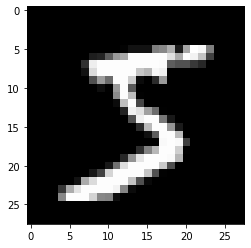

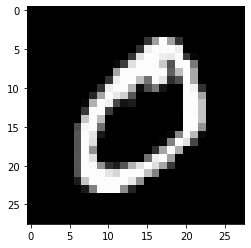

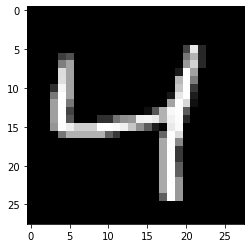

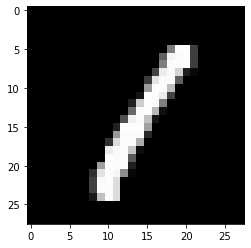

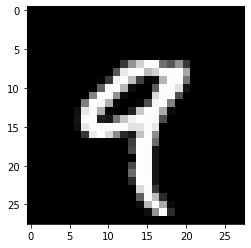

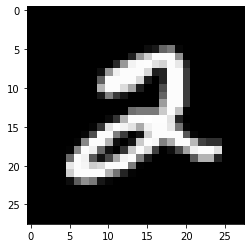

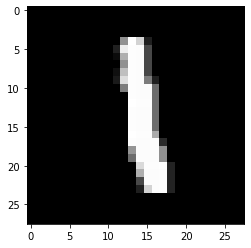

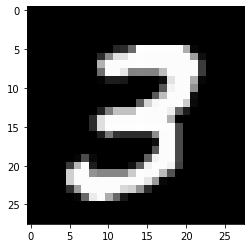

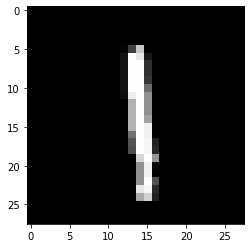

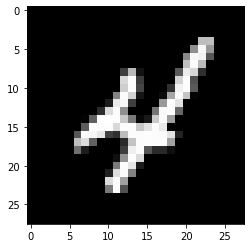

In [34]:
%matplotlib inline

import matplotlib.pyplot as plt # 🔥

for i in range(10):
    plt.figure()
    im = X[i].reshape((28,28))
    plt.imshow(im,cmap="gray")

(-10, 10)

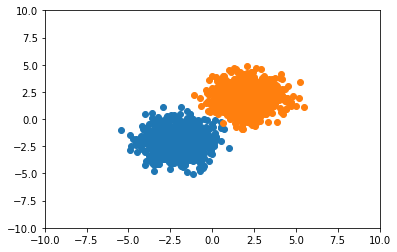

In [35]:
import numpy as np

x1 = np.random.randn(1000)-2
y1 = np.random.randn(1000)-2

x2 = np.random.randn(1000)+2
y2 = np.random.randn(1000)+2

plt.plot(x1,y1,'o')
plt.plot(x2,y2,'o')

plt.xlim(-10,10)
plt.ylim(-10,10)

(2000, 2)


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead o

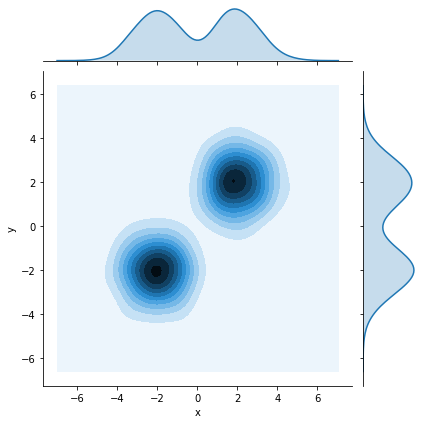

In [37]:
# http://setosa.io/ev/principal-component-analysis/
import seaborn as sns
import pandas as pd

df = pd.DataFrame({"x":[*x1,*x2], "y":[*y1,*y2]})
df.head()
print(df.shape)

sns.jointplot(x="x", y="y", data=df, kind="kde");



In [44]:
zeros = X[np.where(y=='0')]
nines = X[np.where(y=='9')]

In [48]:
zeros = zeros.reshape(zeros.shape[0],28,28)
nines = nines.reshape(nines.shape[0],28,28)

(6903, 28, 28) (6958, 28, 28)


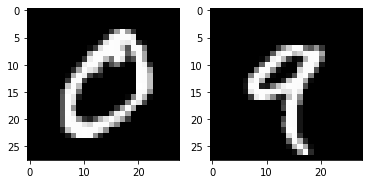

In [55]:
print(zeros.shape,nines.shape)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(zeros[0],cmap="gray")
plt.subplot(1,2,2)
plt.imshow(nines[0],cmap="gray")

In [58]:
s = data.shape
data = np.concatenate([nines,zeros]).reshape(s[0],s[1]*s[2])
print(data.shape)

(13861, 784)


In [69]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

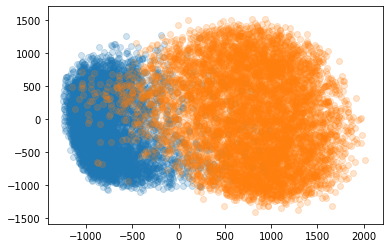

In [78]:
x_data_zero = data_2d[0:6903,0]
y_data_zero = data_2d[0:6903,1]
x_data_nine = data_2d[6903:,0]
y_data_nine = data_2d[6903:,1]
plt.scatter(x_data_zero,y_data_zero,alpha=0.2)
plt.scatter(x_data_nine,y_data_nine,alpha=0.2)

In [134]:
pca = PCA(n_components=2)
data_2d_all = pca.fit_transform(X)
data_2d_all[:10]

array([[ 122.24203481, -316.1962339 ],
       [1010.48634682, -289.94674873],
       [ -58.99847149,  393.71607091],
       [-796.96845689, -607.40987956],
       [-391.31351058,  729.78466872],
       [ 185.96136232,  223.86044496],
       [-730.47576269, -162.02558241],
       [ 503.48327878, -308.71106592],
       [-874.54542548,  -84.32159935],
       [-304.01294889,  463.56640696]])

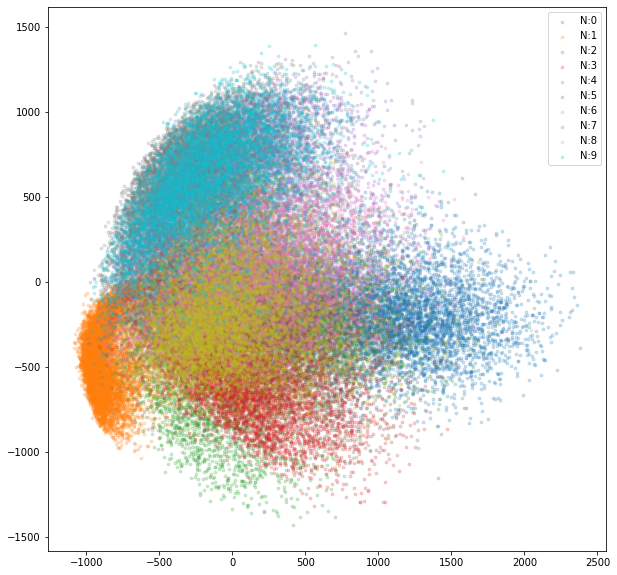

In [133]:
plt.figure(figsize=(10,10))
y = y.astype('int')
for i in range(10):
    points = data_2d_all[np.where(y==i)]
    xx = points[:,0]
    yy = points[:,1]
    plt.scatter(xx,yy, alpha=0.2, s=8)

plt.legend([f"N:{i}" for i in range(10)])

In [139]:
# https://pillow.readthedocs.io/en/stable/
from PIL import Image
import numpy as np
im = Image.open('data/bart.png')

imarr = np.array(im) # im2arr.shape: height x width x channel
print(type(im),type(imarr))


<class 'PIL.PngImagePlugin.PngImageFile'> <class 'numpy.ndarray'>


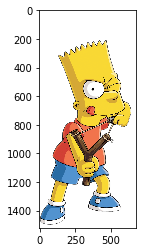

In [140]:
plt.imshow(imarr)

<class 'PIL.Image.Image'>


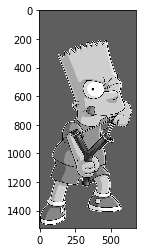

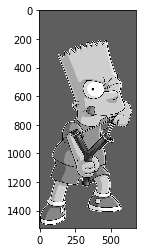

In [153]:
bwim = im.convert("L")
print(type(bwim))
plt.imshow(bwim,cmap="gray")
plt.figure()
plt.imshow(np.array(bwim),cmap="gray")
